<h4 align="center"> In The Name of God </h4>

------
 <h1 align="center"> Artificial Intelligence Project </h1>
 <h3 align="center"> Hosein Ghaderi   &   Ali Khosrozadeh   &   Fatemeh Hajizadeh </h3>
 <h3 align="center"> Main Code (2) </h3>

------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import subprocess
import soundfile as sf
import os
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import re
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# مسیرهای ورودی و خروجی
input_dir = r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\Raw_data"
output_dir = r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\wav_data"

# ساخت دایرکتوری خروجی اگر وجود ندارد
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# تبدیل تمامی فایل‌های .m4a به .wav
for file in os.listdir(input_dir):
    if file.endswith(".m4a"):
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, file.replace(".m4a", ".wav"))
        subprocess.run(["ffmpeg", "-i", input_path, output_path])


In [4]:
# مسیر فایل‌های صوتی
audio_files = glob(r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\wav_data\*.wav")  # جایگزینی مسیر با مسیر واقعی

# چاپ تعداد فایل‌ها
print(f"تعداد فایل‌های صوتی: {len(audio_files)}")


تعداد فایل‌های صوتی: 361


In [5]:
ipd.Audio(audio_files[0])

In [6]:
# تعریف صوت و نرخ نمونه برداری
y , sr = librosa.load(audio_files[0])

print(f'y: {y}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

print('Check Len of Audio:', y.shape[0]/22050)

y: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4358520e-10
 -4.9737992e-14 -1.2726648e-10]
shape y: (122304,)
sr: 22050
Check Len of Audio: 5.546666666666667


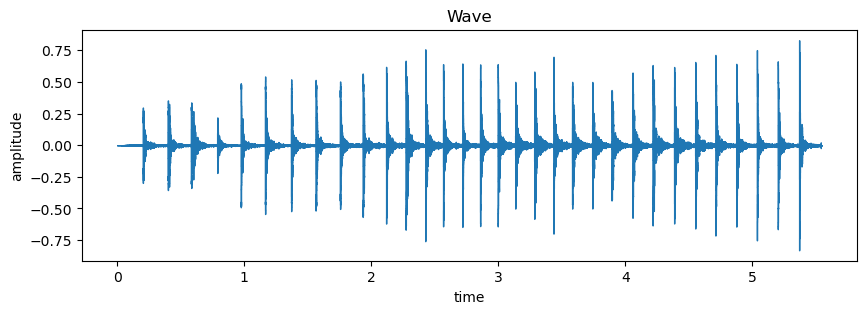

In [7]:
# رسم شکل موج
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title('Wave')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

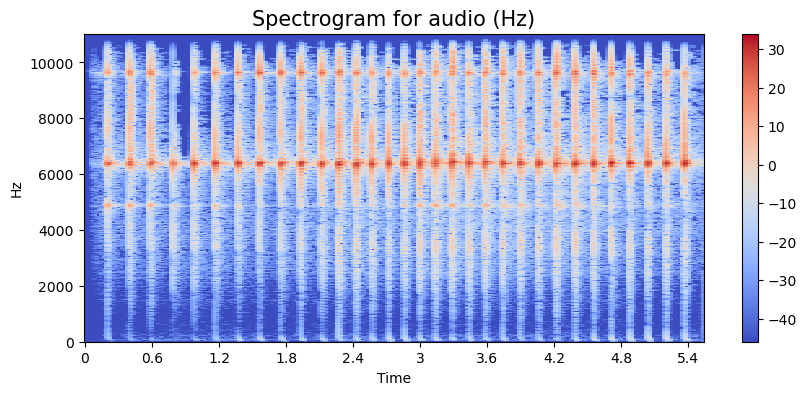

In [8]:
#نمایش نمودار اسپکتروگرام با مقیاس هرتز
X = librosa.stft(y=y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
plt.title('Spectrogram for audio (Hz)', size=15)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

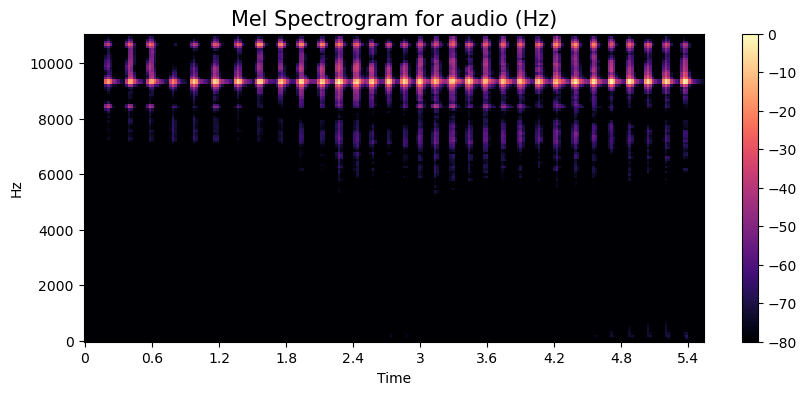

In [9]:
#نمایش نمودار مل اسپکتروگرام با مقیاس هرتز
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10, 4))
plt.title('Mel Spectrogram for audio (Hz)', size=15)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

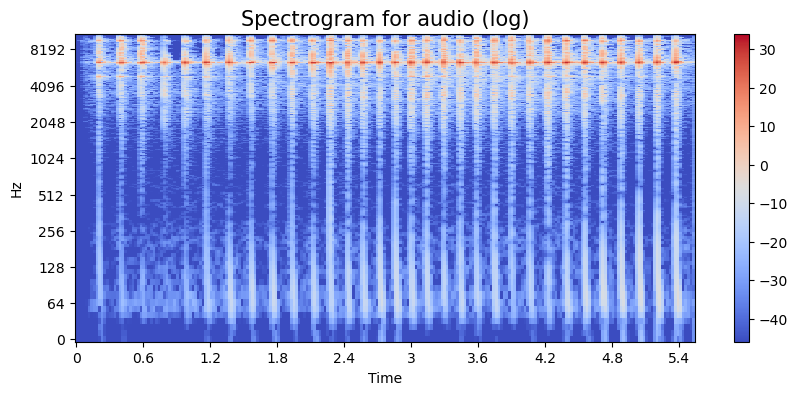

In [10]:
#نمایش نمودار اسپکتروگرام با مقیاس لگاریتمی
X = librosa.stft(y=y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
plt.title('Spectrogram for audio (log)', size=15)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

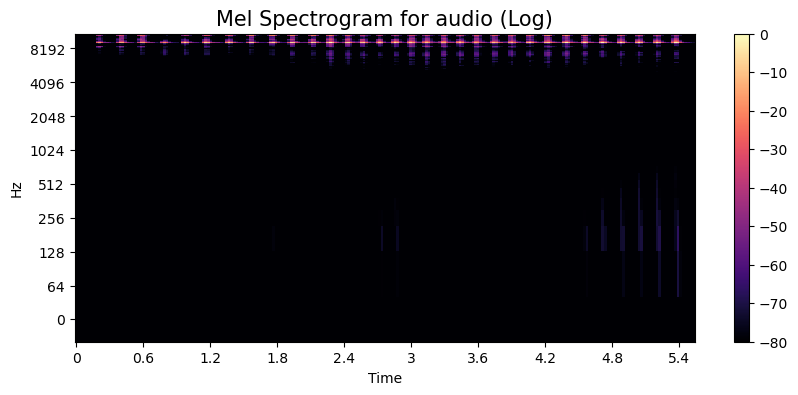

In [11]:
#نمایش نمودار مل اسپکتروگرام با مقیاس لگاریتمی
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10, 4))
plt.title('Mel Spectrogram for audio (Log)', size=15)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [12]:
# تنظیم طول فایل های صوتی به 5 ثانیه
def resize_audio(input_dir, output_dir, target_length=5, sr=16000):
    # اگر پوشه خروجی وجود ندارد، آن را ایجاد کن
    os.makedirs(output_dir, exist_ok=True)

    # پردازش فایل‌ها
    for filename in os.listdir(input_dir):
        if filename.endswith(".wav"):  # فقط فایل‌های wav را پردازش کن
            file_path = os.path.join(input_dir, filename)
            # بارگذاری فایل صوتی و تریم کردن آن
            wav, _ = librosa.load(file_path, sr=sr, mono=True)

            # اگر طول بیشتر از target_length است، 1 ثانیه اول و آخر را حذف می‌کنیم
            if len(wav) > sr * target_length:
                start = int(len(wav) // 2 - sr * target_length // 2)
                end = start + int(sr * target_length)
                wav = wav[start:end]

            # اگر طول کمتر از target_length باشد، پد صفر اضافه می‌کنیم
            elif len(wav) < sr * target_length:
                zero_padding = np.zeros(((sr * target_length - len(wav))//2), dtype=np.float32)
                wav = np.concatenate([zero_padding, wav, zero_padding], axis=0)

            # ذخیره فایل در پوشه جدید
            output_path = os.path.join(output_dir, filename)
            sf.write(output_path, wav, sr)
            print(f"Processed and saved: {filename}")

In [13]:
# استفاده از تابع
input_dir = r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\wav_data"  # مسیر پوشه ورودی
output_dir = r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\Data_resized"  # مسیر پوشه خروجی 
resize_audio(input_dir, output_dir)

Processed and saved: Aluminum 1.wav
Processed and saved: Aluminum 10.wav
Processed and saved: Aluminum 11.wav
Processed and saved: Aluminum 12.wav
Processed and saved: Aluminum 13.wav
Processed and saved: Aluminum 14.wav
Processed and saved: Aluminum 15.wav
Processed and saved: Aluminum 16.wav
Processed and saved: Aluminum 17.wav
Processed and saved: Aluminum 18.wav
Processed and saved: Aluminum 19.wav
Processed and saved: Aluminum 2.wav
Processed and saved: Aluminum 20.wav
Processed and saved: Aluminum 21.wav
Processed and saved: Aluminum 22.wav
Processed and saved: Aluminum 23.wav
Processed and saved: Aluminum 24.wav
Processed and saved: Aluminum 25.wav
Processed and saved: Aluminum 26.wav
Processed and saved: Aluminum 27.wav
Processed and saved: Aluminum 28.wav
Processed and saved: Aluminum 29.wav
Processed and saved: Aluminum 3.wav
Processed and saved: Aluminum 30.wav
Processed and saved: Aluminum 31.wav
Processed and saved: Aluminum 32.wav
Processed and saved: Aluminum 33.wav
Proc

In [14]:
audio_files = glob(r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\Dataset\Data_resized\*.wav")
print(f"تعداد فایل‌های صوتی: {len(audio_files)}")

تعداد فایل‌های صوتی: 361


In [15]:
# تعریف صوت و نرخ نمونه برداری
y , sr = librosa.load(audio_files[0])
print('Check Len of Audio:', y.shape[0]/22050)

Check Len of Audio: 5.0


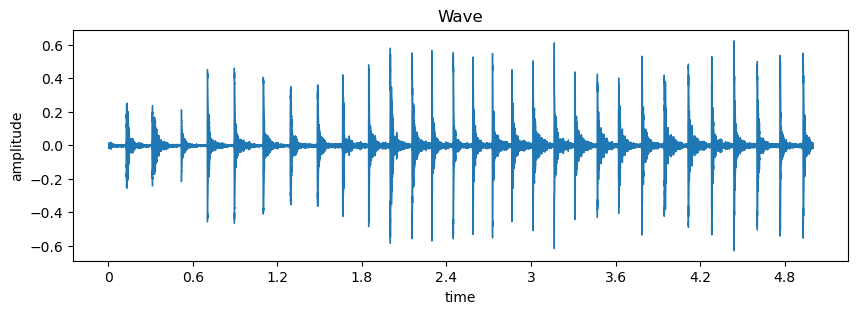

In [16]:
# رسم شکل موج
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y=y, sr=sr)
plt.title('Wave')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

In [17]:
# استخراج نام فایل‌ها بدون پسوند
raw_labels = [os.path.basename(file).replace('.wav', '') for file in audio_files]

# حذف اعداد و فضای خالی مرتبط
processed_labels = [re.sub(r"\s*\d+", "", label).strip() for label in raw_labels]

print("برچسب مربوط به فایل ها استخراج شد")

برچسب مربوط به فایل ها استخراج شد


In [18]:
# استخراج ویژگی های مهم صوت
def extract_features(file_path, sr=22050, n_mfcc=13, n_mels=128):

    y, sr = librosa.load(file_path, sr=sr)

    # اسپکتروگرام
    spectrogram = np.abs(librosa.stft(y))
    spectral_flattened = spectrogram.flatten()

    # مل اسپکتروگرام
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_flattened = mel_spectrogram.flatten()

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_flattened = mfcc.flatten()

    # Chroma
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_flattened = chroma.flatten()

    # کانکت کردن همه ویژگی ها داخل یک بردار ویژگی
    features = np.concatenate((spectral_flattened, mel_flattened, mfcc_flattened, chroma_flattened))

    return features

def process_dataset(file_paths, labels=None):

    feature_list = []
    for file_path in file_paths:
        features = extract_features(file_path)
        feature_list.append(features)

    # تبدیل به یک دیتافریم
    feature_df = pd.DataFrame(feature_list)

    if labels is not None:
        feature_df['label'] = labels

    return feature_df

In [19]:
df = process_dataset(audio_files, labels=processed_labels)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,254439,254440,254441,254442,254443,254444,254445,254446,254447,label
0,0.002910,0.011819,0.016286,0.016976,0.016843,0.017401,0.022810,0.024744,0.019013,0.015008,...,0.004412,0.004268,0.008014,0.012557,0.001903,0.001744,0.002030,0.002340,0.002685,Aluminum
1,0.006494,0.041225,0.066539,0.005597,0.031024,0.001698,0.010759,0.013646,0.014128,0.015032,...,0.004435,0.002678,0.003006,0.019071,0.010065,0.004988,0.003214,0.003271,0.002560,Aluminum
2,0.057365,0.050724,0.021580,0.011424,0.007584,0.007545,0.008033,0.005491,0.004832,0.006930,...,0.003663,0.002882,0.001785,0.001998,0.002965,0.004637,0.009111,0.016756,0.012535,Aluminum
3,0.110772,0.126101,0.055248,0.025232,0.018204,0.016375,0.016289,0.015806,0.015383,0.015063,...,0.004200,0.002153,0.002955,0.005525,0.008042,0.006763,0.007725,0.011797,0.012268,Aluminum
4,0.004572,0.013155,0.014969,0.014260,0.015633,0.015558,0.016057,0.017176,0.016216,0.015578,...,0.045046,0.112024,0.271284,0.259550,0.356210,0.347856,0.329265,0.579630,0.839680,Aluminum


In [20]:
df.shape

(361, 254449)

In [21]:
# شافل کردن (به هم ریختن ترتیب) داده ها در دیتافریم 
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
shuffled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,254439,254440,254441,254442,254443,254444,254445,254446,254447,label
0,0.140837,0.059748,0.088148,0.011735,0.008013,0.013872,0.011405,0.014199,0.027916,0.158434,...,0.088645,0.067215,0.107511,0.133813,0.119261,0.101751,0.168122,0.290776,0.359811,Glass
1,0.001762,0.010387,0.014115,0.014050,0.014270,0.015499,0.016981,0.016434,0.015412,0.016184,...,0.002976,0.000992,0.000456,0.001759,0.002434,0.000981,0.002105,0.001739,0.001746,Aluminum
2,0.014333,0.015371,0.013427,0.015881,0.015322,0.018200,0.032346,0.034394,0.020674,0.013658,...,0.001347,0.000974,0.000994,0.001778,0.001578,0.001365,0.001168,0.003737,0.004951,Aluminum
3,0.005900,0.016433,0.018275,0.015154,0.014093,0.014528,0.015503,0.016861,0.017024,0.017281,...,0.990370,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.827261,Wood
4,0.058263,0.020451,0.014140,0.015742,0.013957,0.013430,0.014039,0.016464,0.021131,0.018813,...,0.009222,0.002705,0.001654,0.001169,0.004330,0.005446,0.003530,0.007030,0.008229,Aluminum


In [23]:
X = shuffled_df.iloc[: ,:-1].values
Y = shuffled_df['label'].values

In [24]:
# تقسیم بندی داده ها
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((270, 254448), (270,), (91, 254448), (91,))

In [25]:
# انکود کردن لیبل های مدنظر
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.transform(np.array(y_test).reshape(-1,1)).toarray()

In [26]:
# اسکیل کردن داده ها
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((270, 254448), (270, 6), (91, 254448), (91, 6))

In [27]:
# آماده سازی داده ها برای ورود به شبکه
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((270, 254448, 1), (270, 6), (91, 254448, 1), (91, 6))

In [28]:
# معماری شبکه عصبی
model=Sequential()
model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(Conv1D(16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254448, 64)        256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127224, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127224, 64)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 127224, 32)        6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 63612, 32)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 63612, 16)         1

In [29]:
# تنظیمات فرآیند آموزش مدل
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.7, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/15
9/9 [==============================] - 52s 6s/step - loss: 18.6688 - accuracy: 0.4481 - val_loss: 0.3016 - val_accuracy: 0.8901 - lr: 0.0010
Epoch 2/15
9/9 [==============================] - 46s 5s/step - loss: 0.1772 - accuracy: 0.9704 - val_loss: 0.3127 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 3/15
9/9 [==============================] - 46s 5s/step - loss: 0.1150 - accuracy: 0.9963 - val_loss: 0.1380 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 4/15
9/9 [==============================] - 46s 5s/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 5/15
9/9 [==============================] - 46s 5s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 6/15
9/9 [==============================] - 46s 5s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 7/15
9/9 [==============================] - 46s 5s/step - loss: 0.0014 - accuracy: 1.00

In [30]:
# from keras.models import load_model

# # لود کردن مدل
# model = load_model(r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\model.keras")

# # بررسی مدل
# model.summary()


3/3 [==============================] - 2s 788ms/step - loss: 0.0473 - accuracy: 0.9780
Accuracy of our model on test data :  97.80219793319702 %


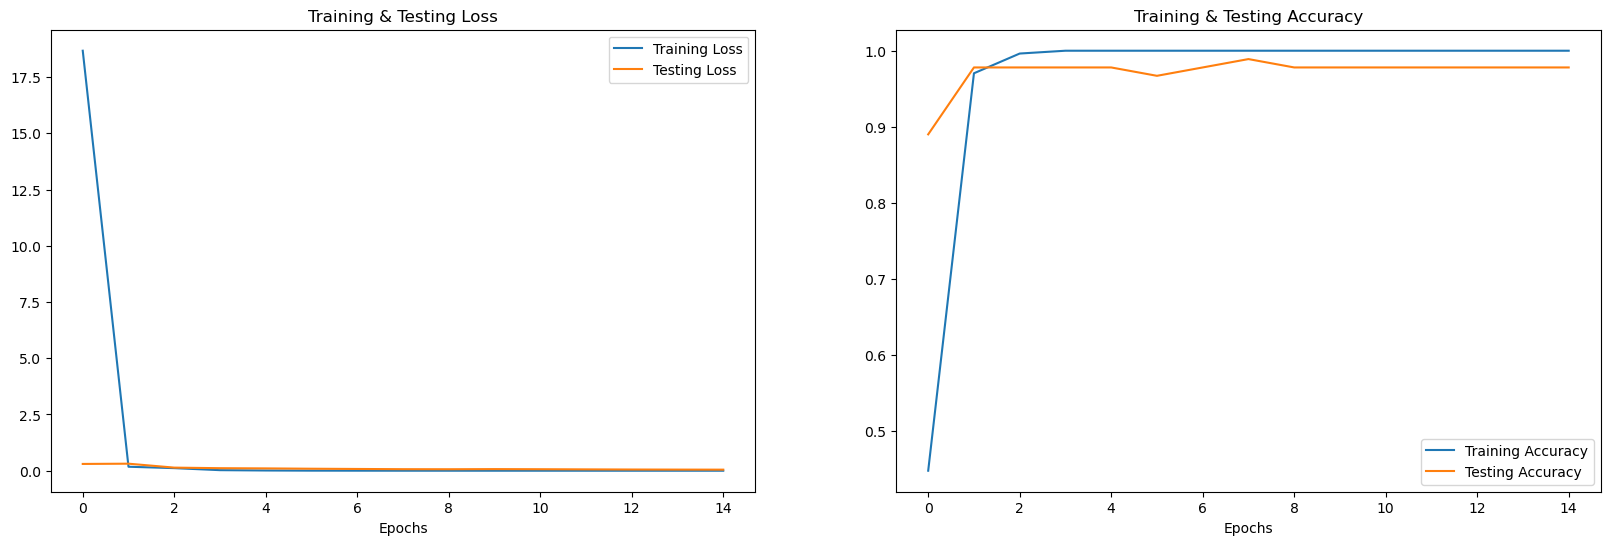

In [31]:
# بررسی دقت مدل روی داده های تست و ایجاد نمودار های دقت (Accuracy) و خطا (Loss)
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [32]:
# پیش بینی روی داده های تست
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

3/3 [==============================] - 3s 792ms/step


In [33]:
# نمایش پیش بینی و واقعیت بصورت یک دیتافریم برای درک بهتر
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,Iron,Iron
1,Aluminum,Aluminum
2,Wood,Wood
3,Iron,Iron
4,Iron,Iron
5,Wood,Wood
6,Cartoon,Cartoon
7,Glass,Glass
8,Aluminum,Aluminum
9,Cartoon,Cartoon


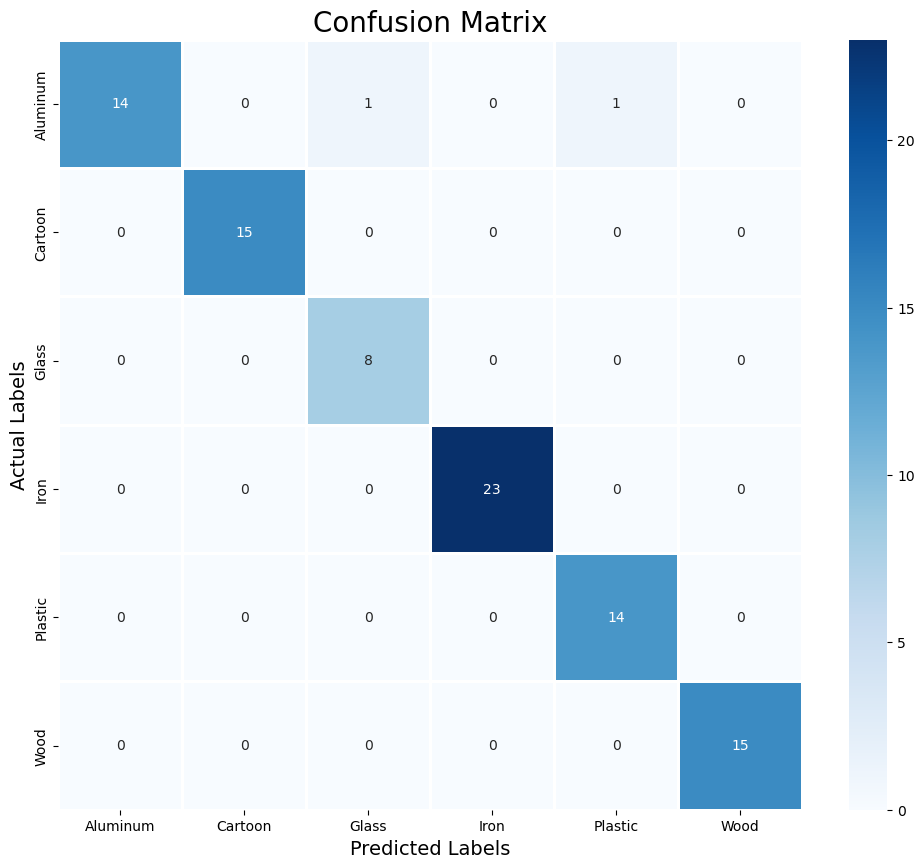

In [34]:
# ایجاد ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
# ذخیره سازی مدل آموزش دیده
model.save(r"C:\Users\ASUS\Desktop\Artificial Intelligence\AI-Project\model.keras")
print("Saved model to disk")

Saved model to disk


In [ ]:
# To access the saved model, please refer to the link below:
# https://drive.google.com/file/d/1tqvcBeW5_g-eYSJerMQah6oOV99JzTOk/view?usp=sharing